# Data Center Network Simulation: Topology Configuration and Visualization

**Author**: Shuojiang Liu

## A Three-tier Data Center Network Simulation

### Import Packages

We need to install the `networkx`, `matplotlib`, and `fnss` packages to create and visualize the network topology.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import fnss

### Greate a Three-tier Data Center Network Topology

Here, we create a three-tier data center network topology with 2 core switches, 4 aggregation switches, 4 edge switches, and 4 hosts per edge switch.

In [2]:
# Create a three-tier data center network topology 
# with 2 core switches, 4 aggregation switches, 4 edge switches, and 8 hosts per edge switch
topology = fnss.three_tier_topology(n_core=2, n_aggregation=4, n_edge=4, n_hosts=8)

In [3]:
# get links of different types of switches and hosts
link_types = nx.get_edge_attributes(topology, 'type')
set_of_link_types = set(link_types.values())
set_of_link_types

{'aggregation_edge', 'core_aggregation', 'edge_leaf'}

### Configure the Network Topology

In [4]:
core_aggregation_links = [link for link in link_types if link_types[link] == 'core_aggregation']
aggregation_edge_links = [link for link in link_types if link_types[link] == 'aggregation_edge']
edge_leaf_links = [link for link in link_types if link_types[link] == 'edge_leaf']
len(core_aggregation_links), len(aggregation_edge_links), len(edge_leaf_links)

(8, 16, 128)

It is important to set the link capacities, delays, buffer sizes, and weights for the network topology.

In [5]:
# Set link capacities
fnss.set_capacities_constant(topology, capacity=50, capacity_unit='Mbps', links=edge_leaf_links)
fnss.set_capacities_constant(topology, capacity=200, capacity_unit='Mbps', links=aggregation_edge_links)
fnss.set_capacities_constant(topology, capacity=1, capacity_unit='Gbps', links=core_aggregation_links)

In [6]:
# Set link delays
fnss.set_delays_constant(topology, delay=4, delay_unit='ms', links=edge_leaf_links)
fnss.set_delays_constant(topology, delay=2, delay_unit='ms', links=aggregation_edge_links)
fnss.set_delays_constant(topology, delay=1, delay_unit='ms', links=core_aggregation_links)

In [7]:
# Set link buffer sizes
fnss.set_buffer_sizes_constant(topology, 100, 'packets')

In [8]:
# Set weights
fnss.set_weights_inverse_capacity(topology)

### Visualize the Network Topology

Choosing a layout algorithm is tricky. The `kamada_kawai_layout` algorithm is a good choice here, while the `graphviz` algorithm is better for tree-like topologies.

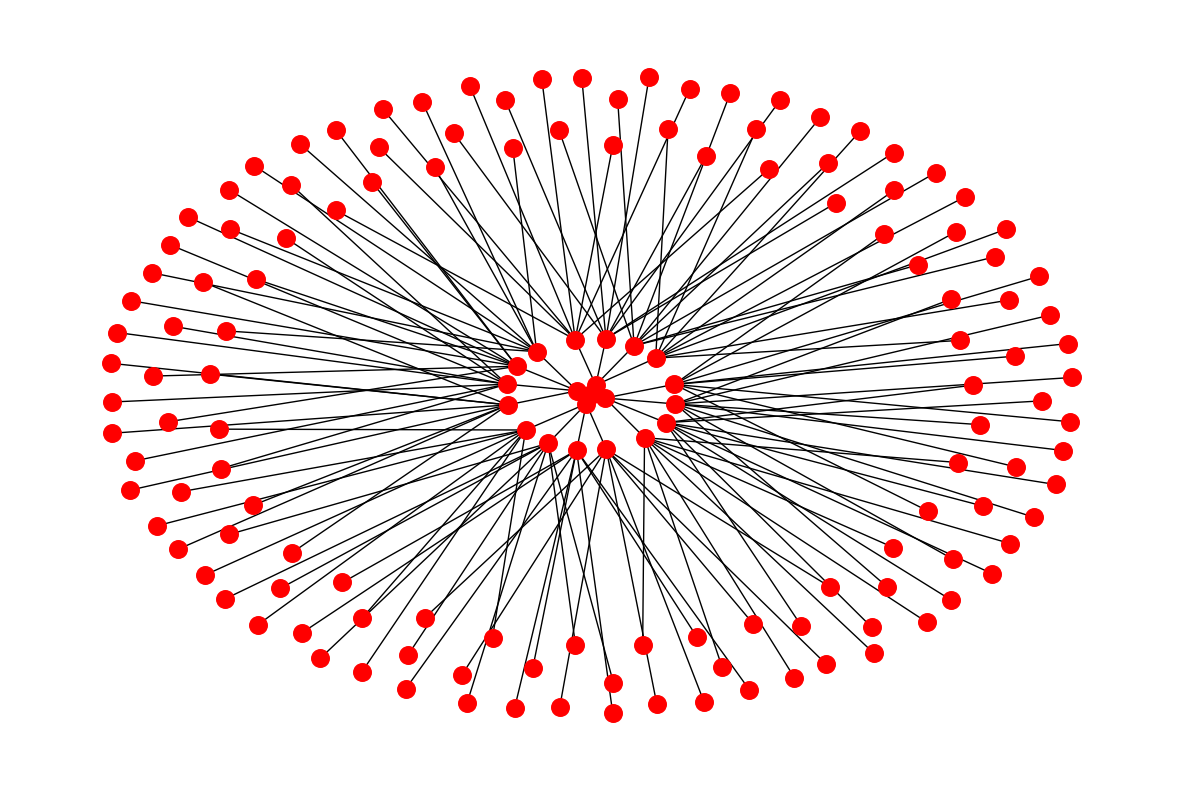

In [37]:
# Draw the network topology
fig, ax = plt.subplots(figsize=(15, 10))
ax.axis('off')
pos = nx.kamada_kawai_layout(topology)
# pos = nx.nx_agraph.graphviz_layout(topology, prog='dot')
nx.draw_networkx(topology, pos, ax=ax, with_labels=False, node_size=160, node_color='red')

### Save the Network Topology

In [10]:
# Save the network topology to a file
fnss.write_topology(topology, 'three_tier_topology.xml')

## A B-Cube Data Center Network Simulation

### Create a B-Cube data center network topology

In [11]:
# Create a B-Cube data center network topology
topology_bcube = fnss.bcube_topology(2, 4)

In [12]:
link_types_bcube = nx.get_edge_attributes(topology_bcube, 'type')
set_of_link_types_bcube = set(link_types_bcube.values())
set_of_link_types_bcube

set()

### Configure the Network Topology

In [13]:
# Set link capacities
fnss.set_capacities_constant(topology_bcube, capacity=16, capacity_unit='Gbps')

In [14]:
# Set link delays
fnss.set_delays_constant(topology_bcube, delay=2, delay_unit='ms')

In [15]:
# Set link buffer sizes
fnss.set_buffer_sizes_constant(topology_bcube, 100, 'packets')

### Visualize the Network Topology

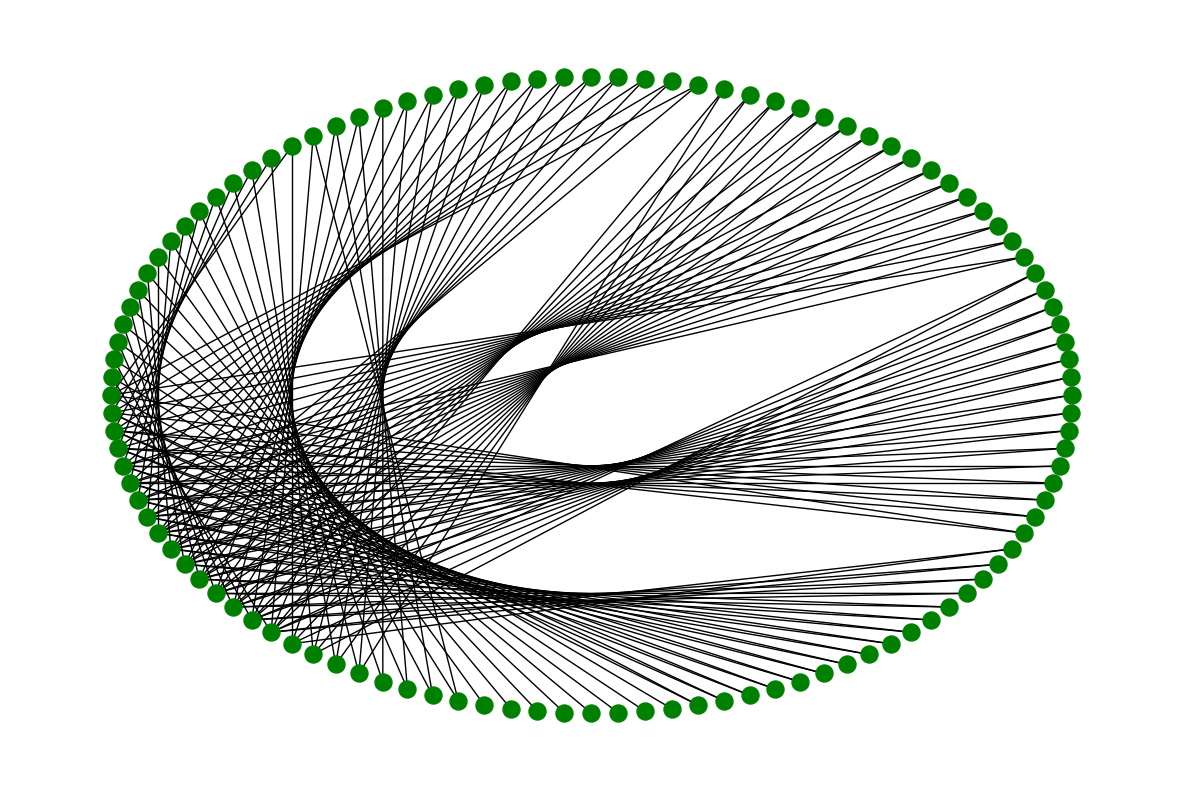

In [16]:
# Draw the network topology
fig, ax = plt.subplots(figsize=(15, 10))
ax.axis('off')
# pos = nx.kamada_kawai_layout(topology_bcube)
pos = nx.shell_layout(topology_bcube)
nx.draw_networkx(topology_bcube, pos, ax=ax, with_labels=False, node_size=150, node_color='green')

### Save the Network Topology

In [17]:
# Save the network topology to a file
fnss.write_topology(topology_bcube, 'bcube_topology.xml')

## A Fat-Tree Data Center Network Simulation

### Create a Fat-Tree data center network topology

In [18]:
# Create a Fat-Tree data center network topology
topology_fat_tree = fnss.fat_tree_topology(4)

In [19]:
link_types_fat_tree = nx.get_edge_attributes(topology_fat_tree, 'type')
set_of_link_types_fat_tree = set(link_types_fat_tree.values())
set_of_link_types_fat_tree

{'aggregation_edge', 'core_aggregation', 'edge_leaf'}

### Configure the Network Topology

In [20]:
core_aggregation_links_fat = [link for link in link_types_fat_tree if link_types_fat_tree[link] == 'core_aggregation']
aggregation_edge_links_fat = [link for link in link_types_fat_tree if link_types_fat_tree[link] == 'aggregation_edge']
edge_leaf_links_fat = [link for link in link_types_fat_tree if link_types_fat_tree[link] == 'edge_leaf']
len(core_aggregation_links_fat), len(aggregation_edge_links_fat), len(edge_leaf_links_fat)

(16, 16, 16)

In [39]:
core_aggregation_links_fat

[(0, 4),
 (0, 8),
 (0, 12),
 (0, 16),
 (1, 4),
 (1, 8),
 (1, 12),
 (1, 16),
 (2, 5),
 (2, 9),
 (2, 13),
 (2, 17),
 (3, 5),
 (3, 9),
 (3, 13),
 (3, 17)]

In [21]:
# Set link capacities
fnss.set_capacities_constant(topology_fat_tree, capacity=50, capacity_unit='Mbps', links=edge_leaf_links_fat)
fnss.set_capacities_constant(topology_fat_tree, capacity=200, capacity_unit='Mbps', links=aggregation_edge_links_fat)
fnss.set_capacities_constant(topology_fat_tree, capacity=1, capacity_unit='Gbps', links=core_aggregation_links_fat)

In [22]:
# Set link delays
fnss.set_delays_constant(topology_fat_tree, delay=4, delay_unit='ms', links=edge_leaf_links_fat)
fnss.set_delays_constant(topology_fat_tree, delay=2, delay_unit='ms', links=aggregation_edge_links_fat)
fnss.set_delays_constant(topology_fat_tree, delay=1, delay_unit='ms', links=core_aggregation_links_fat)

In [23]:
# Set link buffer sizes
fnss.set_buffer_sizes_constant(topology_fat_tree, 100, 'packets')

In [24]:
# Set weights
fnss.set_weights_inverse_capacity(topology_fat_tree)

### Visualize the Network Topology

Note: You need to install the `pygraphviz` package to use the `graphviz` layout. Refer to [https://pygraphviz.github.io/](https://pygraphviz.github.io/) for installation instructions.

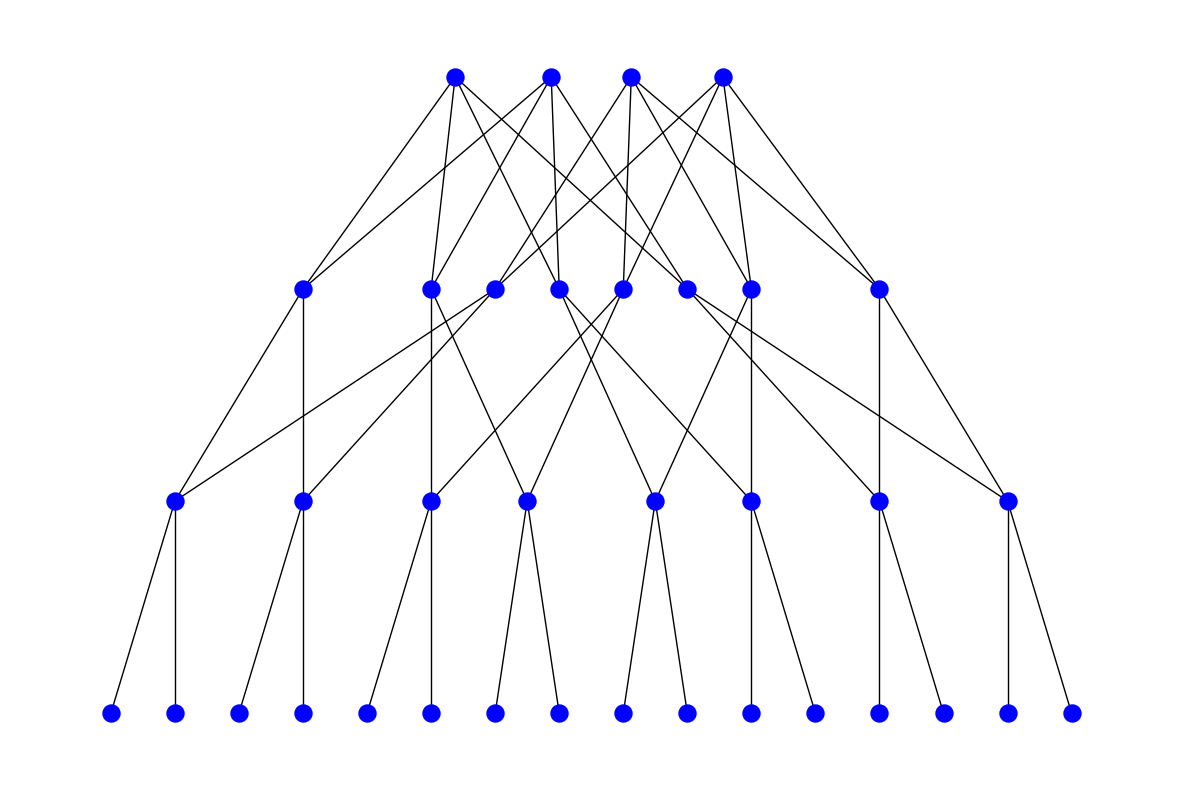

In [35]:
# Draw the network topology
fig, ax = plt.subplots(figsize=(15, 10))
ax.axis('off')
# pos = nx.kamada_kawai_layout(topology_fat_tree)
pos = nx.nx_agraph.graphviz_layout(topology_fat_tree, prog='dot')
nx.draw_networkx(topology_fat_tree, pos, ax=ax, with_labels=False, node_size=150, node_color='blue')

### Save the Network Topology

In [38]:
# Save the network topology to a file
fnss.write_topology(topology_fat_tree, 'fat_tree_topology.xml')